# カタカナ文字認識の学習サンプル

- 今回はシンプルなコードでニューラルネットワークを構築・学習できるkerasを使用する
- kerasはtensorflowの中に同梱されているため，別途インストールの必要はない
- kerasのドキュメント
  - https://keras.io/ja/ （日本語，一部未翻訳のため欠損あり） 
  - https://keras.io/ （英語）
- 使用できる層や最適化アルゴリズムはドキュメントから探してみよう

In [29]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

## データを読む

In [2]:
train_data = np.load("../1_data/train_data.npy")
train_label = np.load("../1_data/train_label.npy")
print("train_data.shape=", train_data.shape)
print("train_label.shape=", train_label.shape)

train_data.shape= (3000, 1, 28, 28)
train_label.shape= (3000, 15)


In [3]:
# 軸の入れ替え
train_data = train_data.transpose(0,2,3,1) # N H W Cにする
print(train_data.shape)

# 正規化
train_data = (train_data - train_data.min()) / train_data.max()
train_data = train_data.astype('float32')
print(train_data)
print()

(3000, 28, 28, 1)
[[[[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [1.        ]
   [1.        ]
   [0.99607843]]

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.6901961 ]
   [1.        ]
   [1.        ]]

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.        ]
   [0.        ]
   [1.        ]]

  ...

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]]


 [[[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]

  ...

  [[0.99607843]
   [0

## trainとtestに分割する（ホールドアウト法）

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_data, # 学習データ
                                                    train_label, # 教師データ
                                                    test_size=0.3, # 全体の何割をテスト用にするか
                                                    random_state=1234, # 乱数のシード値
                                                    shuffle=True # データセットを分ける前にシャッフルするかどうか
                                                   )

print(X_train.shape, X_test.shape)

(2100, 28, 28, 1) (900, 28, 28, 1)


## 学習

In [4]:
def onehot_to_str(label):
    """
    ワンホットベクトル形式のラベルをカタカナ文字に変換する
    """
    dic_katakana = {"a":0,"i":1,"u":2,"e":3,"o":4,"ka":5,"ki":6,"ku":7,"ke":8,"ko":9,"sa":10,"si":11,"su":12,"se":13,"so":14}
    label_int = np.argmax(label)
    for key, value in dic_katakana.items():
        if value==label_int:
            return key

# 画像読み込み
data = np.load("/home/tenkawa/jupyter/dl/DAY3_vr_1_0_0/1_data/train_data.npy")  # パスは適宜変更すること
label = np.load("/home/tenkawa/jupyter/dl/DAY3_vr_1_0_0/1_data/train_label.npy")  # パスは適宜変更すること
label = onehot_to_str(label)

# 軸をN,H,W,Cに入れ替え
data = data.transpose(0,2,3,1)

# 正規化
# train_data = (train_data - train_data.min()) / train_data.max()
# train_data = train_data.astype('float32')

x_train, x_test, y_train, y_test = train_test_split(train_data, # 学習データ
                                                    train_label, # 教師データ
                                                    test_size=0.3, # 全体の何割をテスト用にするか
                                                    random_state=1234, # 乱数のシード値
                                                    shuffle=True # データセットを分ける前にシャッフルするかどうか
                                                   )

print(x_train.shape, x_test.shape)




(2100, 28, 28, 1) (900, 28, 28, 1)


#### 畳み込みニューラルネットワークver.

In [30]:
batch_size = 32#128
num_classes = 15
epochs = 100

# input image dimensions
img_rows, img_cols = 28, 28

input_shape = (img_rows, img_cols, 1)

# モデルの定義
model = Sequential()

# 畳み込み層の定義
model.add(Conv2D(32, # フィルタ数
                 kernel_size=(3, 3), #フィルタサイズ
                 data_format="channels_last", #チャンネルの位置
                 activation='relu', # 活性化関数
                 input_shape=input_shape # 入力画像の配列形式(一層目だけ指定しておけばよい)
                ))
model.add(Conv2D(32, # フィルタ数
                 kernel_size=(3, 3), #フィルタサイズ
                 data_format="channels_last", #チャンネルの位置
                 activation='relu', # 活性化関数
                 input_shape=input_shape # 入力画像の配列形式(一層目だけ指定しておけばよい)
                ))
model.add(BatchNormalization())
# プーリング層の定義
model.add(MaxPooling2D(
                 pool_size=(2, 2) # フィルタサイズ
          ))
model.add(Dropout(0.25))

model.add(Conv2D(64, # フィルタ数
                 kernel_size=(3, 3), #フィルタサイズ
                 data_format="channels_last", #チャンネルの位置
                 activation='relu', # 活性化関数
                 input_shape=input_shape # 入力画像の配列形式(一層目だけ指定しておけばよい)
                ))
model.add(Conv2D(64, # フィルタ数
                 kernel_size=(3, 3), #フィルタサイズ
                 data_format="channels_last", #チャンネルの位置
                 activation='relu', # 活性化関数
                 input_shape=input_shape # 入力画像の配列形式(一層目だけ指定しておけばよい)
                ))
model.add(BatchNormalization())
# プーリング層の定義
model.add(MaxPooling2D(
                 pool_size=(2, 2) # フィルタサイズ
          ))
model.add(Dropout(0.25))

# 全結合層に入力するため，特徴マップをベクトル化する処理
model.add(Flatten())
# 全結合層の定義
model.add(Dense(128, activation='relu'))
# 出力層の定義
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0), #SGD()
              metrics=['accuracy'])

# モデルの内訳を表示する
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)         

Epoch 1/100
66/65 [==============================] - 11s 161ms/step - loss: 1.8350 - acc: 0.4686 - val_loss: 2.6699 - val_acc: 0.0822
Epoch 2/100
66/65 [==============================] - 9s 132ms/step - loss: 0.8987 - acc: 0.7200 - val_loss: 3.1685 - val_acc: 0.1444
Epoch 3/100
66/65 [==============================] - 9s 135ms/step - loss: 0.6752 - acc: 0.7948 - val_loss: 4.0572 - val_acc: 0.1556
Epoch 4/100
66/65 [==============================] - 9s 134ms/step - loss: 0.5355 - acc: 0.8357 - val_loss: 3.9770 - val_acc: 0.2100
Epoch 5/100
66/65 [==============================] - 9s 134ms/step - loss: 0.4652 - acc: 0.8476 - val_loss: 1.8670 - val_acc: 0.4822
Epoch 6/100
66/65 [==============================] - 10s 145ms/step - loss: 0.4157 - acc: 0.8733 - val_loss: 1.1570 - val_acc: 0.6500
Epoch 7/100
66/65 [==============================] - 9s 136ms/step - loss: 0.3701 - acc: 0.8833 - val_loss: 0.2903 - val_acc: 0.9156
Epoch 8/100
66/65 [==============================] - 9s 136ms/step 

66/65 [==============================] - 9s 129ms/step - loss: 0.0832 - acc: 0.9748 - val_loss: 0.1360 - val_acc: 0.9744
Epoch 63/100
66/65 [==============================] - 8s 129ms/step - loss: 0.0717 - acc: 0.9790 - val_loss: 0.1573 - val_acc: 0.9689
Epoch 64/100
66/65 [==============================] - 8s 128ms/step - loss: 0.0700 - acc: 0.9786 - val_loss: 0.0983 - val_acc: 0.9822
Epoch 65/100
66/65 [==============================] - 9s 130ms/step - loss: 0.0751 - acc: 0.9710 - val_loss: 0.1174 - val_acc: 0.9800
Epoch 66/100
66/65 [==============================] - 9s 138ms/step - loss: 0.0805 - acc: 0.9738 - val_loss: 0.1215 - val_acc: 0.9633
Epoch 67/100
66/65 [==============================] - 9s 135ms/step - loss: 0.0689 - acc: 0.9795 - val_loss: 0.1409 - val_acc: 0.9800
Epoch 68/100
66/65 [==============================] - 9s 136ms/step - loss: 0.1040 - acc: 0.9690 - val_loss: 0.1070 - val_acc: 0.9778
Epoch 69/100
66/65 [==============================] - 9s 133ms/step - loss:

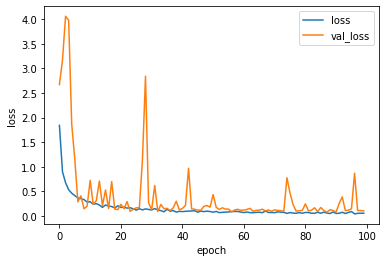

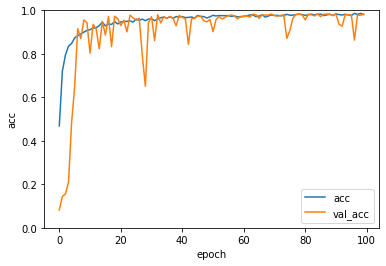

In [31]:
#計算の実行
# ImageDataGeneratorのオブジェクト生成
datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False)

datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
fit = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size, epochs=epochs,
                   verbose=1, validation_data=(x_test, y_test), validation_steps=len(x_test))

# 保存
model.save("katakana_model_RMS_aug_VGG.hdf5")

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 64)         

66/65 [==============================] - 9s 138ms/step - loss: 0.2028 - acc: 0.9410 - val_loss: 0.0651 - val_acc: 0.9789
Epoch 45/100
66/65 [==============================] - 9s 138ms/step - loss: 0.2034 - acc: 0.9333 - val_loss: 0.1115 - val_acc: 0.9667
Epoch 46/100
66/65 [==============================] - 9s 140ms/step - loss: 0.2054 - acc: 0.9381 - val_loss: 0.1191 - val_acc: 0.9667
Epoch 47/100
66/65 [==============================] - 10s 145ms/step - loss: 0.1670 - acc: 0.9505 - val_loss: 0.1036 - val_acc: 0.9678
Epoch 48/100
66/65 [==============================] - 9s 138ms/step - loss: 0.1586 - acc: 0.9505 - val_loss: 0.1329 - val_acc: 0.9611
Epoch 49/100
66/65 [==============================] - 9s 141ms/step - loss: 0.1767 - acc: 0.9452 - val_loss: 0.0970 - val_acc: 0.9644
Epoch 50/100
66/65 [==============================] - 9s 141ms/step - loss: 0.1634 - acc: 0.9486 - val_loss: 0.1134 - val_acc: 0.9678
Epoch 51/100
66/65 [==============================] - 9s 139ms/step - loss

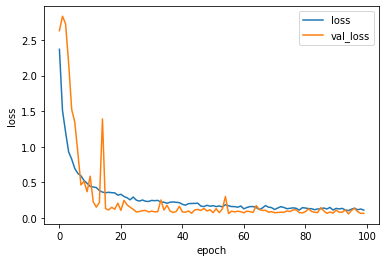

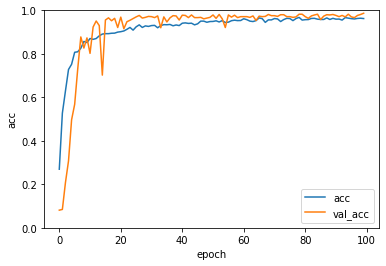

In [32]:
batch_size = 32#128
num_classes = 15
epochs = 100

# input image dimensions
img_rows, img_cols = 28, 28

input_shape = (img_rows, img_cols, 1)

# モデルの定義
model = Sequential()

# 畳み込み層の定義
model.add(Conv2D(32, # フィルタ数
                 kernel_size=(3, 3), #フィルタサイズ
                 data_format="channels_last", #チャンネルの位置
                 activation='relu', # 活性化関数
                 input_shape=input_shape # 入力画像の配列形式(一層目だけ指定しておけばよい)
                ))
model.add(Conv2D(32, # フィルタ数
                 kernel_size=(3, 3), #フィルタサイズ
                 data_format="channels_last", #チャンネルの位置
                 activation='relu', # 活性化関数
                 input_shape=input_shape # 入力画像の配列形式(一層目だけ指定しておけばよい)
                ))
model.add(BatchNormalization())
# プーリング層の定義
model.add(MaxPooling2D(
                 pool_size=(2, 2) # フィルタサイズ
          ))
model.add(Dropout(0.25))

model.add(Conv2D(64, # フィルタ数
                 kernel_size=(3, 3), #フィルタサイズ
                 data_format="channels_last", #チャンネルの位置
                 activation='relu', # 活性化関数
                 input_shape=input_shape # 入力画像の配列形式(一層目だけ指定しておけばよい)
                ))
model.add(Conv2D(64, # フィルタ数
                 kernel_size=(3, 3), #フィルタサイズ
                 data_format="channels_last", #チャンネルの位置
                 activation='relu', # 活性化関数
                 input_shape=input_shape # 入力画像の配列形式(一層目だけ指定しておけばよい)
                ))
model.add(BatchNormalization())
# プーリング層の定義
model.add(MaxPooling2D(
                 pool_size=(2, 2) # フィルタサイズ
          ))
model.add(Dropout(0.25))

# 全結合層に入力するため，特徴マップをベクトル化する処理
model.add(Flatten())
# 全結合層の定義
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# 出力層の定義
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0), #SGD()
              metrics=['accuracy'])

# モデルの内訳を表示する
print(model.summary())
#計算の実行
# ImageDataGeneratorのオブジェクト生成
datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False)

datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
fit = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size, epochs=epochs,
                   verbose=1, validation_data=(x_test, y_test), validation_steps=len(x_test))

# 保存
model.save("katakana_model_RMS_aug_VGG_2.hdf5")

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

In [36]:
batch_size = 32#128
num_classes = 15
epochs = 3000

# input image dimensions
img_rows, img_cols = 28, 28

input_shape = (img_rows, img_cols, 1)

# モデルの定義
model = Sequential()

# 畳み込み層の定義
model.add(Conv2D(32, # フィルタ数
                 kernel_size=(3, 3), #フィルタサイズ
                 data_format="channels_last", #チャンネルの位置
                 activation='relu', # 活性化関数
                 input_shape=input_shape # 入力画像の配列形式(一層目だけ指定しておけばよい)
                ))
model.add(Conv2D(32, # フィルタ数
                 kernel_size=(3, 3), #フィルタサイズ
                 data_format="channels_last", #チャンネルの位置
                 activation='relu', # 活性化関数
                 input_shape=input_shape # 入力画像の配列形式(一層目だけ指定しておけばよい)
                ))
model.add(BatchNormalization())
# プーリング層の定義
model.add(MaxPooling2D(
                 pool_size=(2, 2) # フィルタサイズ
          ))
model.add(Dropout(0.25))

model.add(Conv2D(64, # フィルタ数
                 kernel_size=(3, 3), #フィルタサイズ
                 data_format="channels_last", #チャンネルの位置
                 activation='relu', # 活性化関数
                 input_shape=input_shape # 入力画像の配列形式(一層目だけ指定しておけばよい)
                ))
model.add(Conv2D(64, # フィルタ数
                 kernel_size=(3, 3), #フィルタサイズ
                 data_format="channels_last", #チャンネルの位置
                 activation='relu', # 活性化関数
                 input_shape=input_shape # 入力画像の配列形式(一層目だけ指定しておけばよい)
                ))
model.add(BatchNormalization())
# プーリング層の定義
model.add(MaxPooling2D(
                 pool_size=(2, 2) # フィルタサイズ
          ))
model.add(Dropout(0.25))

# 全結合層に入力するため，特徴マップをベクトル化する処理
model.add(Flatten())
# 全結合層の定義
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# 出力層の定義
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0), #SGD()
              metrics=['accuracy'])

# モデルの内訳を表示する
print(model.summary())
#計算の実行
# ImageDataGeneratorのオブジェクト生成
datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False)

datagen.fit(x_train)

model.load_weights('katakana_model_RMS_aug_VGG_4.hdf5')

#計算の実行
# ImageDataGeneratorのオブジェクト生成
datagen = ImageDataGenerator(
        shear_range=0.15,
        zoom_range=0.15,
        rotation_range=20,
        width_shift_range=0.15,
        height_shift_range=0.15,
        horizontal_flip=False)

datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
fit = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size, epochs=epochs,
                   verbose=1, validation_data=(x_test, y_test), validation_steps=len(x_test))

# 保存
model.save("katakana_model_RMS_aug_VGG_5.hdf5")

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 64)        

66/65 [==============================] - 9s 134ms/step - loss: 0.1190 - acc: 0.9710 - val_loss: 0.0631 - val_acc: 0.9844
Epoch 45/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0941 - acc: 0.9729 - val_loss: 0.0393 - val_acc: 0.9878
Epoch 46/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0961 - acc: 0.9681 - val_loss: 0.0768 - val_acc: 0.9789
Epoch 47/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0879 - acc: 0.9733 - val_loss: 0.0579 - val_acc: 0.9822
Epoch 48/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0998 - acc: 0.9671 - val_loss: 0.0582 - val_acc: 0.9833
Epoch 49/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.1126 - acc: 0.9710 - val_loss: 0.0659 - val_acc: 0.9833
Epoch 50/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.1233 - acc: 0.9629 - val_loss: 0.0701 - val_acc: 0.9833
Epoch 51/3000
66/65 [==============================] - 9s 131ms/step 

Epoch 105/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0867 - acc: 0.9724 - val_loss: 0.0637 - val_acc: 0.9822
Epoch 106/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0806 - acc: 0.9781 - val_loss: 0.0884 - val_acc: 0.9822
Epoch 107/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0937 - acc: 0.9719 - val_loss: 0.0593 - val_acc: 0.9856
Epoch 108/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.1002 - acc: 0.9690 - val_loss: 0.0448 - val_acc: 0.9889
Epoch 109/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.1008 - acc: 0.9705 - val_loss: 0.0517 - val_acc: 0.9867
Epoch 110/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.1174 - acc: 0.9638 - val_loss: 0.0585 - val_acc: 0.9856
Epoch 111/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0939 - acc: 0.9719 - val_loss: 0.0692 - val_acc: 0.9822
Epoch 112/3000
66/65 [==========================

66/65 [==============================] - 9s 130ms/step - loss: 0.0837 - acc: 0.9729 - val_loss: 0.0981 - val_acc: 0.9811
Epoch 166/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0952 - acc: 0.9695 - val_loss: 0.0592 - val_acc: 0.9844
Epoch 167/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0928 - acc: 0.9710 - val_loss: 0.0647 - val_acc: 0.9867
Epoch 168/3000
66/65 [==============================] - 9s 134ms/step - loss: 0.0948 - acc: 0.9695 - val_loss: 0.0619 - val_acc: 0.9889
Epoch 169/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.1074 - acc: 0.9681 - val_loss: 0.0662 - val_acc: 0.9867
Epoch 170/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0970 - acc: 0.9700 - val_loss: 0.0639 - val_acc: 0.9878
Epoch 171/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0942 - acc: 0.9729 - val_loss: 0.0448 - val_acc: 0.9878
Epoch 172/3000
66/65 [==============================] - 9s 130m

66/65 [==============================] - 9s 130ms/step - loss: 0.0917 - acc: 0.9724 - val_loss: 0.0451 - val_acc: 0.9878
Epoch 226/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0911 - acc: 0.9729 - val_loss: 0.0539 - val_acc: 0.9878
Epoch 227/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0823 - acc: 0.9743 - val_loss: 0.0367 - val_acc: 0.9900
Epoch 228/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0839 - acc: 0.9719 - val_loss: 0.0880 - val_acc: 0.9756
Epoch 229/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0726 - acc: 0.9762 - val_loss: 0.0437 - val_acc: 0.9878
Epoch 230/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.1240 - acc: 0.9662 - val_loss: 0.0472 - val_acc: 0.9856
Epoch 231/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0754 - acc: 0.9748 - val_loss: 0.0437 - val_acc: 0.9856
Epoch 232/3000
66/65 [==============================] - 9s 131m

66/65 [==============================] - 9s 130ms/step - loss: 0.0891 - acc: 0.9690 - val_loss: 0.0467 - val_acc: 0.9844
Epoch 286/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0777 - acc: 0.9752 - val_loss: 0.0545 - val_acc: 0.9844
Epoch 287/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0915 - acc: 0.9729 - val_loss: 0.0574 - val_acc: 0.9867
Epoch 288/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0575 - acc: 0.9786 - val_loss: 0.0546 - val_acc: 0.9833
Epoch 289/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0803 - acc: 0.9762 - val_loss: 0.0454 - val_acc: 0.9867
Epoch 290/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0910 - acc: 0.9752 - val_loss: 0.0723 - val_acc: 0.9833
Epoch 291/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0928 - acc: 0.9719 - val_loss: 0.0577 - val_acc: 0.9856
Epoch 292/3000
66/65 [==============================] - 9s 132m

66/65 [==============================] - 9s 130ms/step - loss: 0.0851 - acc: 0.9733 - val_loss: 0.0498 - val_acc: 0.9867
Epoch 346/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0778 - acc: 0.9771 - val_loss: 0.0497 - val_acc: 0.9878
Epoch 347/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0862 - acc: 0.9743 - val_loss: 0.0471 - val_acc: 0.9867
Epoch 348/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0867 - acc: 0.9738 - val_loss: 0.0547 - val_acc: 0.9844
Epoch 349/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0841 - acc: 0.9743 - val_loss: 0.0506 - val_acc: 0.9878
Epoch 350/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.1107 - acc: 0.9738 - val_loss: 0.0485 - val_acc: 0.9878
Epoch 351/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0826 - acc: 0.9748 - val_loss: 0.0319 - val_acc: 0.9889
Epoch 352/3000
66/65 [==============================] - 9s 130m

66/65 [==============================] - 9s 141ms/step - loss: 0.1126 - acc: 0.9710 - val_loss: 0.0704 - val_acc: 0.9811
Epoch 406/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0962 - acc: 0.9748 - val_loss: 0.0533 - val_acc: 0.9811
Epoch 407/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0944 - acc: 0.9738 - val_loss: 0.0614 - val_acc: 0.9822
Epoch 408/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0785 - acc: 0.9810 - val_loss: 0.0554 - val_acc: 0.9878
Epoch 409/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0712 - acc: 0.9767 - val_loss: 0.0431 - val_acc: 0.9867
Epoch 410/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.1122 - acc: 0.9695 - val_loss: 0.0484 - val_acc: 0.9867
Epoch 411/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0961 - acc: 0.9633 - val_loss: 0.0469 - val_acc: 0.9867
Epoch 412/3000
66/65 [==============================] - 9s 135m

66/65 [==============================] - 9s 130ms/step - loss: 0.0827 - acc: 0.9757 - val_loss: 0.1418 - val_acc: 0.9600
Epoch 466/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0689 - acc: 0.9781 - val_loss: 0.0418 - val_acc: 0.9844
Epoch 467/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.1023 - acc: 0.9710 - val_loss: 0.0523 - val_acc: 0.9867
Epoch 468/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0742 - acc: 0.9781 - val_loss: 0.0684 - val_acc: 0.9844
Epoch 469/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0941 - acc: 0.9729 - val_loss: 0.0646 - val_acc: 0.9856
Epoch 470/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0954 - acc: 0.9714 - val_loss: 0.0903 - val_acc: 0.9833
Epoch 471/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0737 - acc: 0.9767 - val_loss: 0.0519 - val_acc: 0.9833
Epoch 472/3000
66/65 [==============================] - 9s 130m

66/65 [==============================] - 9s 130ms/step - loss: 0.0636 - acc: 0.9790 - val_loss: 0.0359 - val_acc: 0.9900
Epoch 526/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0882 - acc: 0.9762 - val_loss: 0.0314 - val_acc: 0.9911
Epoch 527/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0974 - acc: 0.9729 - val_loss: 0.0448 - val_acc: 0.9878
Epoch 528/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0890 - acc: 0.9738 - val_loss: 0.0485 - val_acc: 0.9900
Epoch 529/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0995 - acc: 0.9714 - val_loss: 0.0641 - val_acc: 0.9856
Epoch 530/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0892 - acc: 0.9719 - val_loss: 0.0530 - val_acc: 0.9878
Epoch 531/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.1030 - acc: 0.9714 - val_loss: 0.0454 - val_acc: 0.9889
Epoch 532/3000
66/65 [==============================] - 9s 130m

66/65 [==============================] - 9s 130ms/step - loss: 0.0825 - acc: 0.9743 - val_loss: 0.0476 - val_acc: 0.9867
Epoch 586/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0780 - acc: 0.9776 - val_loss: 0.0519 - val_acc: 0.9833
Epoch 587/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0991 - acc: 0.9733 - val_loss: 0.0486 - val_acc: 0.9844
Epoch 588/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0660 - acc: 0.9805 - val_loss: 0.0414 - val_acc: 0.9822
Epoch 589/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0876 - acc: 0.9714 - val_loss: 0.0579 - val_acc: 0.9822
Epoch 590/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0918 - acc: 0.9757 - val_loss: 0.0461 - val_acc: 0.9878
Epoch 591/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0958 - acc: 0.9748 - val_loss: 0.0511 - val_acc: 0.9844
Epoch 592/3000
66/65 [==============================] - 9s 131m

66/65 [==============================] - 9s 131ms/step - loss: 0.0894 - acc: 0.9729 - val_loss: 0.0515 - val_acc: 0.9856
Epoch 646/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0894 - acc: 0.9752 - val_loss: 0.0389 - val_acc: 0.9900
Epoch 647/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0844 - acc: 0.9752 - val_loss: 0.0357 - val_acc: 0.9878
Epoch 648/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0569 - acc: 0.9824 - val_loss: 0.0400 - val_acc: 0.9867
Epoch 649/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0716 - acc: 0.9781 - val_loss: 0.0377 - val_acc: 0.9856
Epoch 650/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0948 - acc: 0.9700 - val_loss: 0.0459 - val_acc: 0.9867
Epoch 651/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0837 - acc: 0.9771 - val_loss: 0.0542 - val_acc: 0.9856
Epoch 652/3000
66/65 [==============================] - 9s 132m

66/65 [==============================] - 9s 133ms/step - loss: 0.0881 - acc: 0.9733 - val_loss: 0.0415 - val_acc: 0.9878
Epoch 706/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0794 - acc: 0.9786 - val_loss: 0.0689 - val_acc: 0.9833
Epoch 707/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.1020 - acc: 0.9748 - val_loss: 0.0591 - val_acc: 0.9856
Epoch 708/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0892 - acc: 0.9757 - val_loss: 0.0652 - val_acc: 0.9833
Epoch 709/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0833 - acc: 0.9729 - val_loss: 0.0449 - val_acc: 0.9889
Epoch 710/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0977 - acc: 0.9719 - val_loss: 0.0569 - val_acc: 0.9889
Epoch 711/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0834 - acc: 0.9757 - val_loss: 0.0466 - val_acc: 0.9833
Epoch 712/3000
66/65 [==============================] - 9s 131m

66/65 [==============================] - 9s 130ms/step - loss: 0.0697 - acc: 0.9790 - val_loss: 0.0346 - val_acc: 0.9889
Epoch 766/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0833 - acc: 0.9719 - val_loss: 0.0388 - val_acc: 0.9900
Epoch 767/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0854 - acc: 0.9757 - val_loss: 0.0500 - val_acc: 0.9822
Epoch 768/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0849 - acc: 0.9752 - val_loss: 0.0352 - val_acc: 0.9844
Epoch 769/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0605 - acc: 0.9848 - val_loss: 0.0538 - val_acc: 0.9833
Epoch 770/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0783 - acc: 0.9767 - val_loss: 0.0521 - val_acc: 0.9878
Epoch 771/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0873 - acc: 0.9733 - val_loss: 0.0513 - val_acc: 0.9867
Epoch 772/3000
66/65 [==============================] - 9s 131m

66/65 [==============================] - 9s 131ms/step - loss: 0.0918 - acc: 0.9762 - val_loss: 0.0454 - val_acc: 0.9878
Epoch 826/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0603 - acc: 0.9795 - val_loss: 0.0415 - val_acc: 0.9856
Epoch 827/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0748 - acc: 0.9767 - val_loss: 0.0477 - val_acc: 0.9789
Epoch 828/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0797 - acc: 0.9795 - val_loss: 0.0421 - val_acc: 0.9856
Epoch 829/3000
66/65 [==============================] - 9s 134ms/step - loss: 0.0949 - acc: 0.9733 - val_loss: 0.0656 - val_acc: 0.9844
Epoch 830/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0646 - acc: 0.9781 - val_loss: 0.0590 - val_acc: 0.9833
Epoch 831/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0852 - acc: 0.9786 - val_loss: 0.0484 - val_acc: 0.9833
Epoch 832/3000
66/65 [==============================] - 9s 131m

66/65 [==============================] - 9s 131ms/step - loss: 0.0694 - acc: 0.9824 - val_loss: 0.0477 - val_acc: 0.9844
Epoch 886/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0568 - acc: 0.9814 - val_loss: 0.0415 - val_acc: 0.9867
Epoch 887/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0669 - acc: 0.9795 - val_loss: 0.0750 - val_acc: 0.9878
Epoch 888/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0715 - acc: 0.9800 - val_loss: 0.0492 - val_acc: 0.9878
Epoch 889/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0915 - acc: 0.9729 - val_loss: 0.0936 - val_acc: 0.9778
Epoch 890/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0699 - acc: 0.9767 - val_loss: 0.0552 - val_acc: 0.9856
Epoch 891/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0673 - acc: 0.9790 - val_loss: 0.0453 - val_acc: 0.9833
Epoch 892/3000
66/65 [==============================] - 9s 131m

66/65 [==============================] - 9s 132ms/step - loss: 0.0813 - acc: 0.9748 - val_loss: 0.0512 - val_acc: 0.9833
Epoch 946/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0781 - acc: 0.9767 - val_loss: 0.0650 - val_acc: 0.9844
Epoch 947/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0678 - acc: 0.9776 - val_loss: 0.0466 - val_acc: 0.9878
Epoch 948/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0653 - acc: 0.9795 - val_loss: 0.0518 - val_acc: 0.9856
Epoch 949/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0803 - acc: 0.9733 - val_loss: 0.0444 - val_acc: 0.9844
Epoch 950/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0766 - acc: 0.9781 - val_loss: 0.0890 - val_acc: 0.9756
Epoch 951/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0648 - acc: 0.9786 - val_loss: 0.0636 - val_acc: 0.9833
Epoch 952/3000
66/65 [==============================] - 9s 130m

66/65 [==============================] - 9s 131ms/step - loss: 0.0644 - acc: 0.9824 - val_loss: 0.0818 - val_acc: 0.9822
Epoch 1006/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0627 - acc: 0.9824 - val_loss: 0.0512 - val_acc: 0.9844
Epoch 1007/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0728 - acc: 0.9767 - val_loss: 0.0488 - val_acc: 0.9856
Epoch 1008/3000
66/65 [==============================] - 9s 134ms/step - loss: 0.0649 - acc: 0.9814 - val_loss: 0.0498 - val_acc: 0.9867
Epoch 1009/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0695 - acc: 0.9800 - val_loss: 0.0536 - val_acc: 0.9844
Epoch 1010/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0911 - acc: 0.9733 - val_loss: 0.0497 - val_acc: 0.9867
Epoch 1011/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0630 - acc: 0.9776 - val_loss: 0.0521 - val_acc: 0.9833
Epoch 1012/3000
66/65 [==============================] - 

Epoch 1065/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0766 - acc: 0.9757 - val_loss: 0.0546 - val_acc: 0.9867
Epoch 1066/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0791 - acc: 0.9719 - val_loss: 0.0539 - val_acc: 0.9844
Epoch 1067/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0762 - acc: 0.9757 - val_loss: 0.0763 - val_acc: 0.9800
Epoch 1068/3000
66/65 [==============================] - 9s 135ms/step - loss: 0.0542 - acc: 0.9805 - val_loss: 0.0581 - val_acc: 0.9833
Epoch 1069/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0635 - acc: 0.9767 - val_loss: 0.0609 - val_acc: 0.9856
Epoch 1070/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0560 - acc: 0.9833 - val_loss: 0.0604 - val_acc: 0.9856
Epoch 1071/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0687 - acc: 0.9786 - val_loss: 0.0622 - val_acc: 0.9822
Epoch 1072/3000
66/65 [==================

Epoch 1125/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0674 - acc: 0.9833 - val_loss: 0.0689 - val_acc: 0.9833
Epoch 1126/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0787 - acc: 0.9733 - val_loss: 0.0666 - val_acc: 0.9811
Epoch 1127/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0586 - acc: 0.9833 - val_loss: 0.0547 - val_acc: 0.9889
Epoch 1128/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0802 - acc: 0.9748 - val_loss: 0.0537 - val_acc: 0.9856
Epoch 1129/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0936 - acc: 0.9781 - val_loss: 0.0303 - val_acc: 0.9911
Epoch 1130/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0663 - acc: 0.9810 - val_loss: 0.0428 - val_acc: 0.9878
Epoch 1131/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0671 - acc: 0.9814 - val_loss: 0.0641 - val_acc: 0.9844
Epoch 1132/3000
66/65 [==================

Epoch 1185/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0682 - acc: 0.9824 - val_loss: 0.0690 - val_acc: 0.9822
Epoch 1186/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0701 - acc: 0.9814 - val_loss: 0.0782 - val_acc: 0.9822
Epoch 1187/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0614 - acc: 0.9814 - val_loss: 0.0924 - val_acc: 0.9800
Epoch 1188/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0687 - acc: 0.9781 - val_loss: 0.0398 - val_acc: 0.9867
Epoch 1189/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0807 - acc: 0.9786 - val_loss: 0.0443 - val_acc: 0.9900
Epoch 1190/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0757 - acc: 0.9776 - val_loss: 0.0488 - val_acc: 0.9856
Epoch 1191/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0936 - acc: 0.9738 - val_loss: 0.0417 - val_acc: 0.9867
Epoch 1192/3000
66/65 [==================

Epoch 1245/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0765 - acc: 0.9752 - val_loss: 0.0493 - val_acc: 0.9856
Epoch 1246/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0714 - acc: 0.9800 - val_loss: 0.0534 - val_acc: 0.9878
Epoch 1247/3000
66/65 [==============================] - 9s 134ms/step - loss: 0.0784 - acc: 0.9743 - val_loss: 0.0571 - val_acc: 0.9844
Epoch 1248/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0691 - acc: 0.9800 - val_loss: 0.0470 - val_acc: 0.9844
Epoch 1249/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0777 - acc: 0.9776 - val_loss: 0.0413 - val_acc: 0.9889
Epoch 1250/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0683 - acc: 0.9805 - val_loss: 0.0574 - val_acc: 0.9856
Epoch 1251/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0801 - acc: 0.9805 - val_loss: 0.0607 - val_acc: 0.9856
Epoch 1252/3000
66/65 [==================

66/65 [==============================] - 9s 131ms/step - loss: 0.0654 - acc: 0.9786 - val_loss: 0.0734 - val_acc: 0.9867
Epoch 1305/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0781 - acc: 0.9771 - val_loss: 0.0554 - val_acc: 0.9844
Epoch 1306/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0630 - acc: 0.9814 - val_loss: 0.0459 - val_acc: 0.9867
Epoch 1307/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0676 - acc: 0.9795 - val_loss: 0.0547 - val_acc: 0.9844
Epoch 1308/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0787 - acc: 0.9752 - val_loss: 0.0361 - val_acc: 0.9889
Epoch 1309/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0605 - acc: 0.9805 - val_loss: 0.0509 - val_acc: 0.9878
Epoch 1310/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0656 - acc: 0.9805 - val_loss: 0.0703 - val_acc: 0.9811
Epoch 1311/3000
66/65 [==============================] - 

Epoch 1364/3000
66/65 [==============================] - 9s 134ms/step - loss: 0.1021 - acc: 0.9724 - val_loss: 0.0407 - val_acc: 0.9900
Epoch 1365/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0846 - acc: 0.9757 - val_loss: 0.0531 - val_acc: 0.9867
Epoch 1366/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0729 - acc: 0.9795 - val_loss: 0.0514 - val_acc: 0.9844
Epoch 1367/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0965 - acc: 0.9743 - val_loss: 0.0451 - val_acc: 0.9844
Epoch 1368/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0759 - acc: 0.9771 - val_loss: 0.0393 - val_acc: 0.9878
Epoch 1369/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0721 - acc: 0.9800 - val_loss: 0.0490 - val_acc: 0.9867
Epoch 1370/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0617 - acc: 0.9819 - val_loss: 0.0446 - val_acc: 0.9833
Epoch 1371/3000
66/65 [==================

Epoch 1424/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0687 - acc: 0.9800 - val_loss: 0.0500 - val_acc: 0.9878
Epoch 1425/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0646 - acc: 0.9819 - val_loss: 0.0569 - val_acc: 0.9856
Epoch 1426/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0654 - acc: 0.9790 - val_loss: 0.0829 - val_acc: 0.9767
Epoch 1427/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0907 - acc: 0.9748 - val_loss: 0.0733 - val_acc: 0.9856
Epoch 1428/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0576 - acc: 0.9810 - val_loss: 0.0503 - val_acc: 0.9889
Epoch 1429/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0506 - acc: 0.9852 - val_loss: 0.0723 - val_acc: 0.9822
Epoch 1430/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0637 - acc: 0.9833 - val_loss: 0.0742 - val_acc: 0.9822
Epoch 1431/3000
66/65 [==================

Epoch 1484/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0603 - acc: 0.9824 - val_loss: 0.0662 - val_acc: 0.9811
Epoch 1485/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0484 - acc: 0.9814 - val_loss: 0.0982 - val_acc: 0.9778
Epoch 1486/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0757 - acc: 0.9805 - val_loss: 0.0550 - val_acc: 0.9856
Epoch 1487/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0814 - acc: 0.9752 - val_loss: 0.0857 - val_acc: 0.9789
Epoch 1488/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0600 - acc: 0.9810 - val_loss: 0.0425 - val_acc: 0.9878
Epoch 1489/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0695 - acc: 0.9771 - val_loss: 0.0659 - val_acc: 0.9767
Epoch 1490/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0575 - acc: 0.9824 - val_loss: 0.0601 - val_acc: 0.9800
Epoch 1491/3000
66/65 [==================

Epoch 1544/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0743 - acc: 0.9776 - val_loss: 0.0872 - val_acc: 0.9811
Epoch 1545/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0756 - acc: 0.9771 - val_loss: 0.0504 - val_acc: 0.9844
Epoch 1546/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0919 - acc: 0.9781 - val_loss: 0.0514 - val_acc: 0.9822
Epoch 1547/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0791 - acc: 0.9786 - val_loss: 0.0681 - val_acc: 0.9822
Epoch 1548/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0385 - acc: 0.9867 - val_loss: 0.0838 - val_acc: 0.9778
Epoch 1549/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0752 - acc: 0.9762 - val_loss: 0.0772 - val_acc: 0.9811
Epoch 1550/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0708 - acc: 0.9790 - val_loss: 0.0686 - val_acc: 0.9811
Epoch 1551/3000
66/65 [==================

Epoch 1604/3000
66/65 [==============================] - 9s 136ms/step - loss: 0.0700 - acc: 0.9814 - val_loss: 0.0682 - val_acc: 0.9833
Epoch 1605/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0768 - acc: 0.9795 - val_loss: 0.0475 - val_acc: 0.9811
Epoch 1606/3000
66/65 [==============================] - 9s 135ms/step - loss: 0.0584 - acc: 0.9829 - val_loss: 0.0669 - val_acc: 0.9811
Epoch 1607/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0783 - acc: 0.9743 - val_loss: 0.0636 - val_acc: 0.9833
Epoch 1608/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0779 - acc: 0.9800 - val_loss: 0.0735 - val_acc: 0.9800
Epoch 1609/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0622 - acc: 0.9829 - val_loss: 0.0731 - val_acc: 0.9822
Epoch 1610/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0924 - acc: 0.9733 - val_loss: 0.0652 - val_acc: 0.9778
Epoch 1611/3000
66/65 [==================

Epoch 1664/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0697 - acc: 0.9814 - val_loss: 0.0667 - val_acc: 0.9811
Epoch 1665/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0787 - acc: 0.9786 - val_loss: 0.0703 - val_acc: 0.9822
Epoch 1666/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0578 - acc: 0.9838 - val_loss: 0.0838 - val_acc: 0.9844
Epoch 1667/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0619 - acc: 0.9819 - val_loss: 0.0657 - val_acc: 0.9844
Epoch 1668/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0693 - acc: 0.9814 - val_loss: 0.0533 - val_acc: 0.9867
Epoch 1669/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0510 - acc: 0.9857 - val_loss: 0.0546 - val_acc: 0.9833
Epoch 1670/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0625 - acc: 0.9805 - val_loss: 0.0596 - val_acc: 0.9811
Epoch 1671/3000
66/65 [==================

Epoch 1724/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0460 - acc: 0.9857 - val_loss: 0.0732 - val_acc: 0.9822
Epoch 1725/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0602 - acc: 0.9810 - val_loss: 0.0602 - val_acc: 0.9811
Epoch 1726/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0730 - acc: 0.9805 - val_loss: 0.0603 - val_acc: 0.9844
Epoch 1727/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0659 - acc: 0.9833 - val_loss: 0.0515 - val_acc: 0.9856
Epoch 1728/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0668 - acc: 0.9790 - val_loss: 0.0811 - val_acc: 0.9822
Epoch 1729/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0600 - acc: 0.9819 - val_loss: 0.0676 - val_acc: 0.9833
Epoch 1730/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0677 - acc: 0.9805 - val_loss: 0.0688 - val_acc: 0.9833
Epoch 1731/3000
66/65 [==================

Epoch 1784/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0741 - acc: 0.9814 - val_loss: 0.0578 - val_acc: 0.9844
Epoch 1785/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0608 - acc: 0.9814 - val_loss: 0.0600 - val_acc: 0.9822
Epoch 1786/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0630 - acc: 0.9810 - val_loss: 0.0523 - val_acc: 0.9833
Epoch 1787/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0579 - acc: 0.9852 - val_loss: 0.0523 - val_acc: 0.9833
Epoch 1788/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0704 - acc: 0.9805 - val_loss: 0.0578 - val_acc: 0.9833
Epoch 1789/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0470 - acc: 0.9857 - val_loss: 0.0560 - val_acc: 0.9822
Epoch 1790/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0571 - acc: 0.9838 - val_loss: 0.0576 - val_acc: 0.9844
Epoch 1791/3000
66/65 [==================

Epoch 1844/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0668 - acc: 0.9805 - val_loss: 0.0896 - val_acc: 0.9778
Epoch 1845/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0616 - acc: 0.9848 - val_loss: 0.0607 - val_acc: 0.9800
Epoch 1846/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0740 - acc: 0.9795 - val_loss: 0.0567 - val_acc: 0.9844
Epoch 1847/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0725 - acc: 0.9786 - val_loss: 0.0604 - val_acc: 0.9833
Epoch 1848/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0830 - acc: 0.9776 - val_loss: 0.0610 - val_acc: 0.9856
Epoch 1849/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0679 - acc: 0.9781 - val_loss: 0.0650 - val_acc: 0.9844
Epoch 1850/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0649 - acc: 0.9786 - val_loss: 0.0741 - val_acc: 0.9833
Epoch 1851/3000
66/65 [==================

Epoch 1904/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0778 - acc: 0.9781 - val_loss: 0.0705 - val_acc: 0.9833
Epoch 1905/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0544 - acc: 0.9805 - val_loss: 0.0490 - val_acc: 0.9867
Epoch 1906/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0582 - acc: 0.9838 - val_loss: 0.0680 - val_acc: 0.9833
Epoch 1907/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0560 - acc: 0.9838 - val_loss: 0.0710 - val_acc: 0.9833
Epoch 1908/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0476 - acc: 0.9833 - val_loss: 0.0811 - val_acc: 0.9822
Epoch 1909/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0667 - acc: 0.9800 - val_loss: 0.0664 - val_acc: 0.9822
Epoch 1910/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0684 - acc: 0.9824 - val_loss: 0.0472 - val_acc: 0.9856
Epoch 1911/3000
66/65 [==================

Epoch 1964/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.1052 - acc: 0.9733 - val_loss: 0.0355 - val_acc: 0.9889
Epoch 1965/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0651 - acc: 0.9843 - val_loss: 0.0411 - val_acc: 0.9844
Epoch 1966/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0452 - acc: 0.9857 - val_loss: 0.0494 - val_acc: 0.9856
Epoch 1967/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0911 - acc: 0.9743 - val_loss: 0.0481 - val_acc: 0.9856
Epoch 1968/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0747 - acc: 0.9824 - val_loss: 0.0275 - val_acc: 0.9878
Epoch 1969/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0574 - acc: 0.9843 - val_loss: 0.0402 - val_acc: 0.9867
Epoch 1970/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0652 - acc: 0.9810 - val_loss: 0.0362 - val_acc: 0.9878
Epoch 1971/3000
66/65 [==================

Epoch 2024/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0480 - acc: 0.9838 - val_loss: 0.0710 - val_acc: 0.9844
Epoch 2025/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0746 - acc: 0.9781 - val_loss: 0.0714 - val_acc: 0.9833
Epoch 2026/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0564 - acc: 0.9819 - val_loss: 0.0583 - val_acc: 0.9844
Epoch 2027/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0615 - acc: 0.9838 - val_loss: 0.0544 - val_acc: 0.9844
Epoch 2028/3000
66/65 [==============================] - 9s 134ms/step - loss: 0.0708 - acc: 0.9800 - val_loss: 0.0619 - val_acc: 0.9867
Epoch 2029/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0521 - acc: 0.9838 - val_loss: 0.0575 - val_acc: 0.9844
Epoch 2030/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0684 - acc: 0.9819 - val_loss: 0.0444 - val_acc: 0.9878
Epoch 2031/3000
66/65 [==================

Epoch 2084/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0710 - acc: 0.9800 - val_loss: 0.0438 - val_acc: 0.9900
Epoch 2085/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0659 - acc: 0.9805 - val_loss: 0.0673 - val_acc: 0.9844
Epoch 2086/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0709 - acc: 0.9781 - val_loss: 0.0578 - val_acc: 0.9878
Epoch 2087/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0647 - acc: 0.9824 - val_loss: 0.0551 - val_acc: 0.9822
Epoch 2088/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0705 - acc: 0.9795 - val_loss: 0.0642 - val_acc: 0.9822
Epoch 2089/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0851 - acc: 0.9767 - val_loss: 0.0794 - val_acc: 0.9856
Epoch 2090/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0669 - acc: 0.9795 - val_loss: 0.0357 - val_acc: 0.9911
Epoch 2091/3000
66/65 [==================

Epoch 2144/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0706 - acc: 0.9800 - val_loss: 0.0831 - val_acc: 0.9844
Epoch 2145/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0392 - acc: 0.9871 - val_loss: 0.0617 - val_acc: 0.9833
Epoch 2146/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0590 - acc: 0.9781 - val_loss: 0.0505 - val_acc: 0.9844
Epoch 2147/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0558 - acc: 0.9843 - val_loss: 0.0455 - val_acc: 0.9867
Epoch 2148/3000
66/65 [==============================] - 9s 134ms/step - loss: 0.0741 - acc: 0.9805 - val_loss: 0.0535 - val_acc: 0.9856
Epoch 2149/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0548 - acc: 0.9843 - val_loss: 0.0694 - val_acc: 0.9844
Epoch 2150/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0685 - acc: 0.9819 - val_loss: 0.0632 - val_acc: 0.9867
Epoch 2151/3000
66/65 [==================

Epoch 2204/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0533 - acc: 0.9819 - val_loss: 0.0558 - val_acc: 0.9856
Epoch 2205/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0525 - acc: 0.9829 - val_loss: 0.0489 - val_acc: 0.9867
Epoch 2206/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0729 - acc: 0.9767 - val_loss: 0.0566 - val_acc: 0.9878
Epoch 2207/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0768 - acc: 0.9786 - val_loss: 0.0575 - val_acc: 0.9833
Epoch 2208/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0724 - acc: 0.9833 - val_loss: 0.0454 - val_acc: 0.9856
Epoch 2209/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0390 - acc: 0.9876 - val_loss: 0.0652 - val_acc: 0.9844
Epoch 2210/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0539 - acc: 0.9862 - val_loss: 0.0645 - val_acc: 0.9811
Epoch 2211/3000
66/65 [==================

Epoch 2264/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0493 - acc: 0.9843 - val_loss: 0.0563 - val_acc: 0.9833
Epoch 2265/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0625 - acc: 0.9824 - val_loss: 0.0483 - val_acc: 0.9856
Epoch 2266/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0895 - acc: 0.9790 - val_loss: 0.0468 - val_acc: 0.9856
Epoch 2267/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0717 - acc: 0.9771 - val_loss: 0.0591 - val_acc: 0.9833
Epoch 2268/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0668 - acc: 0.9810 - val_loss: 0.0377 - val_acc: 0.9878
Epoch 2269/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0633 - acc: 0.9814 - val_loss: 0.0504 - val_acc: 0.9833
Epoch 2270/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0588 - acc: 0.9824 - val_loss: 0.0525 - val_acc: 0.9844
Epoch 2271/3000
66/65 [==================

Epoch 2324/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0479 - acc: 0.9857 - val_loss: 0.0552 - val_acc: 0.9844
Epoch 2325/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0739 - acc: 0.9814 - val_loss: 0.0529 - val_acc: 0.9844
Epoch 2326/3000
66/65 [==============================] - 9s 138ms/step - loss: 0.0581 - acc: 0.9814 - val_loss: 0.0690 - val_acc: 0.9811
Epoch 2327/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0789 - acc: 0.9786 - val_loss: 0.0553 - val_acc: 0.9822
Epoch 2328/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0655 - acc: 0.9814 - val_loss: 0.0475 - val_acc: 0.9856
Epoch 2329/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0585 - acc: 0.9805 - val_loss: 0.0565 - val_acc: 0.9856
Epoch 2330/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0553 - acc: 0.9843 - val_loss: 0.0513 - val_acc: 0.9867
Epoch 2331/3000
66/65 [==================

Epoch 2384/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0573 - acc: 0.9833 - val_loss: 0.0816 - val_acc: 0.9811
Epoch 2385/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0537 - acc: 0.9838 - val_loss: 0.0459 - val_acc: 0.9878
Epoch 2386/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0773 - acc: 0.9781 - val_loss: 0.0522 - val_acc: 0.9867
Epoch 2387/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0591 - acc: 0.9810 - val_loss: 0.0777 - val_acc: 0.9811
Epoch 2388/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0458 - acc: 0.9867 - val_loss: 0.0706 - val_acc: 0.9833
Epoch 2389/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0736 - acc: 0.9790 - val_loss: 0.0658 - val_acc: 0.9856
Epoch 2390/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0591 - acc: 0.9819 - val_loss: 0.0739 - val_acc: 0.9833
Epoch 2391/3000
66/65 [==================

Epoch 2444/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0619 - acc: 0.9833 - val_loss: 0.0486 - val_acc: 0.9856
Epoch 2445/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0638 - acc: 0.9829 - val_loss: 0.0558 - val_acc: 0.9833
Epoch 2446/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0673 - acc: 0.9833 - val_loss: 0.0874 - val_acc: 0.9811
Epoch 2447/3000
66/65 [==============================] - 9s 144ms/step - loss: 0.0487 - acc: 0.9862 - val_loss: 0.0788 - val_acc: 0.9800
Epoch 2448/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0843 - acc: 0.9790 - val_loss: 0.0684 - val_acc: 0.9878
Epoch 2449/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0588 - acc: 0.9814 - val_loss: 0.0629 - val_acc: 0.9844
Epoch 2450/3000
66/65 [==============================] - 10s 150ms/step - loss: 0.0586 - acc: 0.9786 - val_loss: 0.0549 - val_acc: 0.9856
Epoch 2451/3000
66/65 [=================

Epoch 2504/3000
66/65 [==============================] - 9s 134ms/step - loss: 0.0647 - acc: 0.9810 - val_loss: 0.0519 - val_acc: 0.9867
Epoch 2505/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0502 - acc: 0.9867 - val_loss: 0.0599 - val_acc: 0.9833
Epoch 2506/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0580 - acc: 0.9819 - val_loss: 0.0662 - val_acc: 0.9856
Epoch 2507/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0482 - acc: 0.9867 - val_loss: 0.0531 - val_acc: 0.9844
Epoch 2508/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0634 - acc: 0.9814 - val_loss: 0.0543 - val_acc: 0.9867
Epoch 2509/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0615 - acc: 0.9838 - val_loss: 0.0705 - val_acc: 0.9833
Epoch 2510/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0711 - acc: 0.9790 - val_loss: 0.0515 - val_acc: 0.9856
Epoch 2511/3000
66/65 [==================

Epoch 2564/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0459 - acc: 0.9881 - val_loss: 0.0550 - val_acc: 0.9833
Epoch 2565/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0431 - acc: 0.9857 - val_loss: 0.0694 - val_acc: 0.9800
Epoch 2566/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0643 - acc: 0.9843 - val_loss: 0.0570 - val_acc: 0.9856
Epoch 2567/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0590 - acc: 0.9824 - val_loss: 0.0486 - val_acc: 0.9856
Epoch 2568/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0674 - acc: 0.9819 - val_loss: 0.0461 - val_acc: 0.9889
Epoch 2569/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0522 - acc: 0.9824 - val_loss: 0.0707 - val_acc: 0.9800
Epoch 2570/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0610 - acc: 0.9824 - val_loss: 0.0576 - val_acc: 0.9833
Epoch 2571/3000
66/65 [==================

Epoch 2624/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0440 - acc: 0.9862 - val_loss: 0.0583 - val_acc: 0.9856
Epoch 2625/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0766 - acc: 0.9805 - val_loss: 0.0376 - val_acc: 0.9900
Epoch 2626/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0660 - acc: 0.9824 - val_loss: 0.0467 - val_acc: 0.9878
Epoch 2627/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0728 - acc: 0.9848 - val_loss: 0.0418 - val_acc: 0.9878
Epoch 2628/3000
66/65 [==============================] - 9s 134ms/step - loss: 0.0631 - acc: 0.9833 - val_loss: 0.0529 - val_acc: 0.9856
Epoch 2629/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0730 - acc: 0.9814 - val_loss: 0.0538 - val_acc: 0.9833
Epoch 2630/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0600 - acc: 0.9838 - val_loss: 0.0358 - val_acc: 0.9878
Epoch 2631/3000
66/65 [==================

Epoch 2684/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0561 - acc: 0.9843 - val_loss: 0.0240 - val_acc: 0.9889
Epoch 2685/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0354 - acc: 0.9886 - val_loss: 0.0381 - val_acc: 0.9878
Epoch 2686/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0487 - acc: 0.9862 - val_loss: 0.0377 - val_acc: 0.9878
Epoch 2687/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0493 - acc: 0.9838 - val_loss: 0.0541 - val_acc: 0.9844
Epoch 2688/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0734 - acc: 0.9805 - val_loss: 0.0511 - val_acc: 0.9867
Epoch 2689/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0793 - acc: 0.9781 - val_loss: 0.0914 - val_acc: 0.9800
Epoch 2690/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0437 - acc: 0.9862 - val_loss: 0.0484 - val_acc: 0.9867
Epoch 2691/3000
66/65 [==================

Epoch 2744/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0508 - acc: 0.9852 - val_loss: 0.0819 - val_acc: 0.9822
Epoch 2745/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0657 - acc: 0.9800 - val_loss: 0.0339 - val_acc: 0.9911
Epoch 2746/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0620 - acc: 0.9805 - val_loss: 0.0561 - val_acc: 0.9856
Epoch 2747/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0560 - acc: 0.9819 - val_loss: 0.0430 - val_acc: 0.9867
Epoch 2748/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0707 - acc: 0.9810 - val_loss: 0.0516 - val_acc: 0.9844
Epoch 2749/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0556 - acc: 0.9848 - val_loss: 0.0540 - val_acc: 0.9889
Epoch 2750/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0649 - acc: 0.9833 - val_loss: 0.0543 - val_acc: 0.9867
Epoch 2751/3000
66/65 [==================

Epoch 2804/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0569 - acc: 0.9843 - val_loss: 0.0294 - val_acc: 0.9878
Epoch 2805/3000
66/65 [==============================] - 9s 138ms/step - loss: 0.0806 - acc: 0.9800 - val_loss: 0.0448 - val_acc: 0.9867
Epoch 2806/3000
66/65 [==============================] - 9s 137ms/step - loss: 0.0724 - acc: 0.9776 - val_loss: 0.0428 - val_acc: 0.9867
Epoch 2807/3000
66/65 [==============================] - 9s 134ms/step - loss: 0.0706 - acc: 0.9824 - val_loss: 0.0432 - val_acc: 0.9867
Epoch 2808/3000
66/65 [==============================] - 9s 135ms/step - loss: 0.0550 - acc: 0.9848 - val_loss: 0.0530 - val_acc: 0.9844
Epoch 2809/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0657 - acc: 0.9852 - val_loss: 0.0301 - val_acc: 0.9878
Epoch 2810/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0609 - acc: 0.9795 - val_loss: 0.0364 - val_acc: 0.9867
Epoch 2811/3000
66/65 [==================

Epoch 2864/3000
66/65 [==============================] - 9s 136ms/step - loss: 0.0510 - acc: 0.9857 - val_loss: 0.0577 - val_acc: 0.9878
Epoch 2865/3000
66/65 [==============================] - 9s 135ms/step - loss: 0.0605 - acc: 0.9814 - val_loss: 0.0576 - val_acc: 0.9833
Epoch 2866/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0698 - acc: 0.9814 - val_loss: 0.0480 - val_acc: 0.9856
Epoch 2867/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0526 - acc: 0.9838 - val_loss: 0.0777 - val_acc: 0.9822
Epoch 2868/3000
66/65 [==============================] - 9s 136ms/step - loss: 0.0634 - acc: 0.9781 - val_loss: 0.0566 - val_acc: 0.9856
Epoch 2869/3000
66/65 [==============================] - 9s 135ms/step - loss: 0.0445 - acc: 0.9833 - val_loss: 0.0537 - val_acc: 0.9856
Epoch 2870/3000
66/65 [==============================] - 9s 133ms/step - loss: 0.0564 - acc: 0.9829 - val_loss: 0.0724 - val_acc: 0.9811
Epoch 2871/3000
66/65 [==================

Epoch 2924/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0507 - acc: 0.9843 - val_loss: 0.0642 - val_acc: 0.9833
Epoch 2925/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0551 - acc: 0.9852 - val_loss: 0.0690 - val_acc: 0.9789
Epoch 2926/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0583 - acc: 0.9824 - val_loss: 0.0851 - val_acc: 0.9822
Epoch 2927/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0437 - acc: 0.9862 - val_loss: 0.0793 - val_acc: 0.9833
Epoch 2928/3000
66/65 [==============================] - 9s 134ms/step - loss: 0.0487 - acc: 0.9862 - val_loss: 0.0732 - val_acc: 0.9867
Epoch 2929/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0599 - acc: 0.9805 - val_loss: 0.0628 - val_acc: 0.9844
Epoch 2930/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0742 - acc: 0.9786 - val_loss: 0.0459 - val_acc: 0.9856
Epoch 2931/3000
66/65 [==================

Epoch 2984/3000
66/65 [==============================] - 9s 132ms/step - loss: 0.0745 - acc: 0.9752 - val_loss: 0.0514 - val_acc: 0.9889
Epoch 2985/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0744 - acc: 0.9805 - val_loss: 0.0575 - val_acc: 0.9844
Epoch 2986/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0572 - acc: 0.9852 - val_loss: 0.0704 - val_acc: 0.9822
Epoch 2987/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0811 - acc: 0.9767 - val_loss: 0.0492 - val_acc: 0.9833
Epoch 2988/3000
66/65 [==============================] - 9s 130ms/step - loss: 0.0475 - acc: 0.9843 - val_loss: 0.0598 - val_acc: 0.9867
Epoch 2989/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0575 - acc: 0.9833 - val_loss: 0.0452 - val_acc: 0.9911
Epoch 2990/3000
66/65 [==============================] - 9s 131ms/step - loss: 0.0877 - acc: 0.9805 - val_loss: 0.0662 - val_acc: 0.9856
Epoch 2991/3000
66/65 [==================